In [166]:
# dataloader

import torch
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

In [185]:
# set arguments
# !pip install easydict
from easydict import EasyDict

args = EasyDict({
    'dataset_name': 'mnist',
    'data_root': '../data/',
    'resolution': 32
})

In [186]:
# define transform
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(args.resolution),
    transforms.CenterCrop(args.resolution),
    transforms.Normalize(0, 1)
])

In [187]:
# Load image dataset
# dataset_name = 'cifar10'
# data_root = '../data/'

dataset_classes = [ds for ds in dir(torchvision.datasets) 
                   if ds.lower() == args.dataset_name.lower()]
assert dataset_classes, f'Dataset name {args.dataset_name} does not exist'
dataset_class = getattr(torchvision.datasets, dataset_classes[0])

train_dataset = dataset_class(root=args.data_root, train=True, download=True, transform=data_transforms)
test_dataset = dataset_class(root=args.data_root, train=False, download=True, transform=data_transforms)

In [188]:
# define sampler
def get_sampler(dataset, classes=[0]):
    if isinstance(classes, int): classes = [classes]
    targets = torch.tensor(dataset.targets)
    mask = torch.zeros_like(targets)
    for c in classes:
        mask += targets==c
    target_idx = mask.nonzero().flatten().tolist()    
    sampler = torch.utils.data.sampler.SubsetRandomSampler(target_idx)
    return sampler

In [189]:
train_dataset[0][0].size()

torch.Size([1, 32, 32])

In [190]:
train_dataloader = DataLoader(
    train_dataset, 
    batch_size=4,
    sampler=get_sampler(train_dataset, [0, 1]),
    drop_last=True,
)
test_dataloader = DataLoader(
    test_dataset, 
    batch_size=4,
    sampler=get_sampler(test_dataset, [0, 1]),
    drop_last=True,
)

<ipython-input-188-e7e8a588ee4e>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(dataset.targets)


In [191]:
def plot_images(imgs):
    import matplotlib.pyplot as plt
    imgs = torchvision.utils.make_grid(imgs)
    plt.imshow(imgs.permute(1, 2, 0).squeeze())

tensor([1, 1, 1, 0])


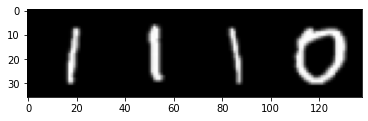

In [192]:
imgs, labels = next(iter(train_dataloader))
imgs.size()
print(labels)
plot_images(imgs)